- Les fichiers sont déjà importés dans mon folder data. Il sont au format txt.

- Je vais récupérer les mots de tous les textes de chaque année concernée par mon travail 

- Nettoyer le texte et en extraire les mots clés dans un premier temps

## Import des librairies

In [1]:
import os
import yake

## Initialisation de l'extracteur de mots-clés

In [2]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

Les fichiers contenant les textes de chaque période sont stockés chacun dans un dossier

In [3]:
data_path = "../data/camille_politique_culturelle_50-70/" #changer les dates du dossier pour avoir chaque période
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [4]:
#Afficher la nombre de fichiers textes par période
len(files)

316

## Extraire les mots-clés de tous les documents de la première période

In [5]:
for f in sorted(files)[:38]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

BE-KBR00_15463334_19681201_60_00_00_0_01_0250_29124534.txt mentions these keywords: L'ENTRE SAMBRE, Information générale, bon support, vie locale, monde lit, prospère région...
BE-KBR00_15463334_19691201_64_00_00_0_01_0266_29128250.txt mentions these keywords: CGOURRIER HEBDOMADAIRE, L'ENTRE SAMBRE, Information générale, bon support, vie locale, monde lit, prospère région...
BE-KBR00_15463334_19701201_68_00_00_0_01_0286_29156634.txt mentions these keywords: COURRIER HEBDOMADAIRE, Information générale, Familiale bed, bed Spectacles, L'ENTRE SAMBRE, bon support, prospèêre région, vie locale, monde lit...
KB_JB1051_1951-03-15_01-00004.txt mentions these keywords: dit Morrel, dit Albert, monsieur Morrel, PERSONNEL ENSEIGNANT, l'enseignement moyen, dit Debray, dit Châ, dépenses militaires, BELGICA AUSMENTE, Théo DEJACE...
KB_JB1051_1952-05-16_01-00006.txt mentions these keywords: Boris TCHIRKOV, Grand Prix, belles années, Tchirkov fut, William Wyler, TCHIRKOV BORIS, d'Espoir Grands, film it

KeyboardInterrupt: 

## Nettoyer le texte et extraire les nots qui reviennent le plus 

In [6]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nettoyer le texte du fichier d'une période 

Initialisation d'une liste de stop words pour le nettoyage des textes

In [49]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "quant", "très", "rue", "ceux", "quatre", "six", "etc", "enfin", "cas", "elles", "samedi", "mois", "tant", "agit", "ici", "hui", "beaucoup", "jour", "nombre", "très", "leur", "selon", "car", "pays", "bruxelles", "conseil", "politique", "ministre", "président", "gouvernement", "part", "cours", "ans", "leurs", "soir", "grand", "toute", "avant", "grande", "celui", "belgique", "premier", "déjà", "temps", "quelques", "lieu", "également", "point", "peu"]
sw = set(sw)


In [50]:
files = [f for f in os.listdir("../data/camille_politique_culturelle_50-70")
        if f != "_README.txt"]

txt_path = '../data/camille_politique_culturelle_50-70'


In [9]:
len(files)

315

In [51]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in files:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [52]:
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'camille50_70.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [53]:
def clean_text(folder="../data/tmp/camille50_70"):
    if folder is None:
        input_path = f"{folder}.txt"
        output_path = f"{folder}_clean.txt"
    else:
        input_path = f"{folder}.txt"
        output_path = f"{folder}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [54]:
clean_text()

'Output has been written in ../data/tmp/camille50_70_clean.txt!'

## Réaliser un nuage de mots avec le texte nettoyés.

In [55]:
with open(os.path.join(temp_path, f'camille50_70_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GÉNÉRAL', 1312), ('ETAT', 1245), ('PRIX', 1108), ('COMMISSION', 1077), ('LOI', 1068), ('BELGE', 1055), ('TRAVAIL', 1002), ('VIE', 994), ('HEURES', 992), ('FOIS', 977)]


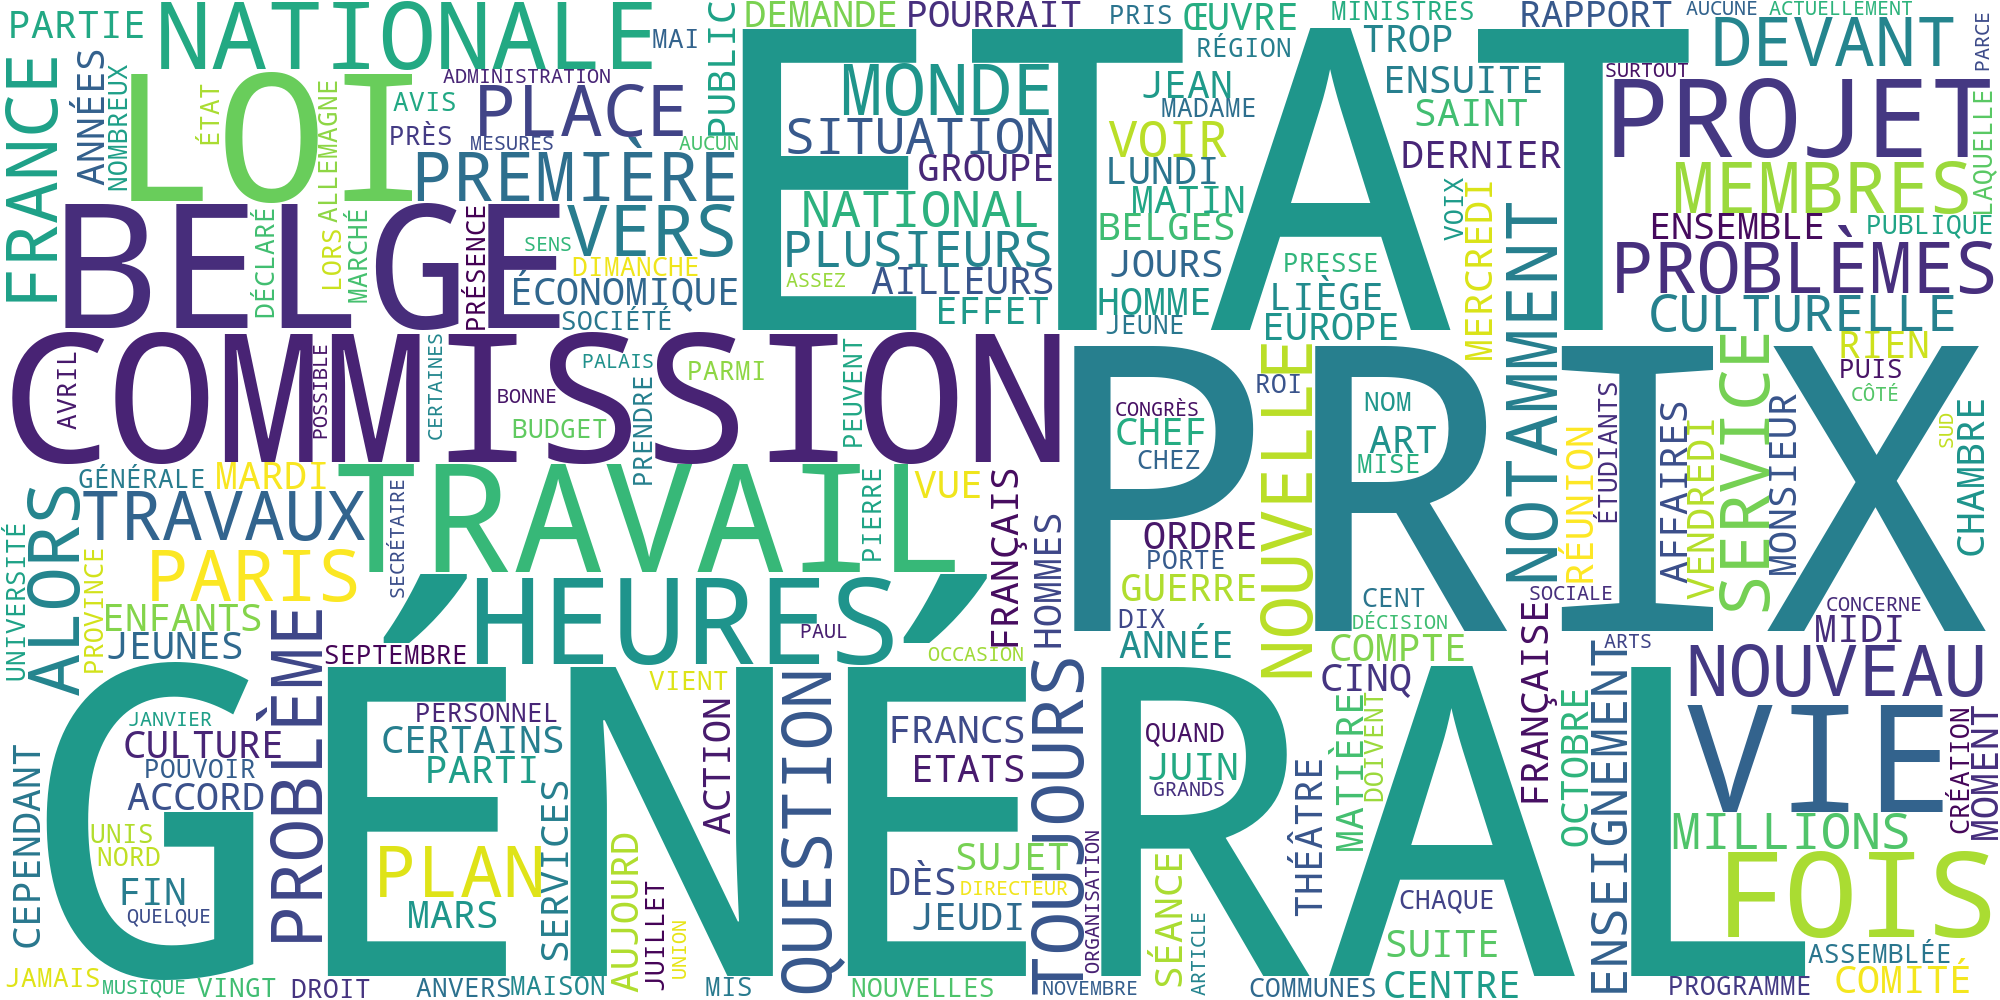

In [56]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"camille50_70.png"))
Image(filename=os.path.join(temp_path, f"camille50_70.png"))